In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
from google.colab  import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/THI'

In [5]:
data = read_csv(path + "/AAPL/AAPL_15102019.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/14/2016,117.879997,118.169998,117.129997,117.629997,112.129311,35652200
1,10/17/2016,117.330002,117.839996,116.779999,117.550003,112.053062,23624900
2,10/18/2016,118.180000,118.209999,117.449997,117.470001,111.976814,24553500
3,10/19/2016,117.250000,117.760002,113.800003,117.120003,111.643173,20034600
4,10/20/2016,116.860001,117.379997,116.330002,117.059998,111.585983,24125800


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
749,10/8/2019,225.820007,228.059998,224.330002,224.399994,224.399994,27955000
750,10/9/2019,227.029999,227.789993,225.639999,227.029999,227.029999,18692600
751,10/10/2019,227.929993,230.440002,227.300003,230.089996,230.089996,28253400
752,10/11/2019,232.949997,237.639999,232.309998,236.210007,236.210007,41698900
753,10/14/2019,234.899994,238.130005,234.669998,235.869995,235.869995,24106900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
Date         754 non-null object
Open         754 non-null float64
High         754 non-null float64
Low          754 non-null float64
Close        754 non-null float64
Adj Close    754 non-null float64
Volume       754 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


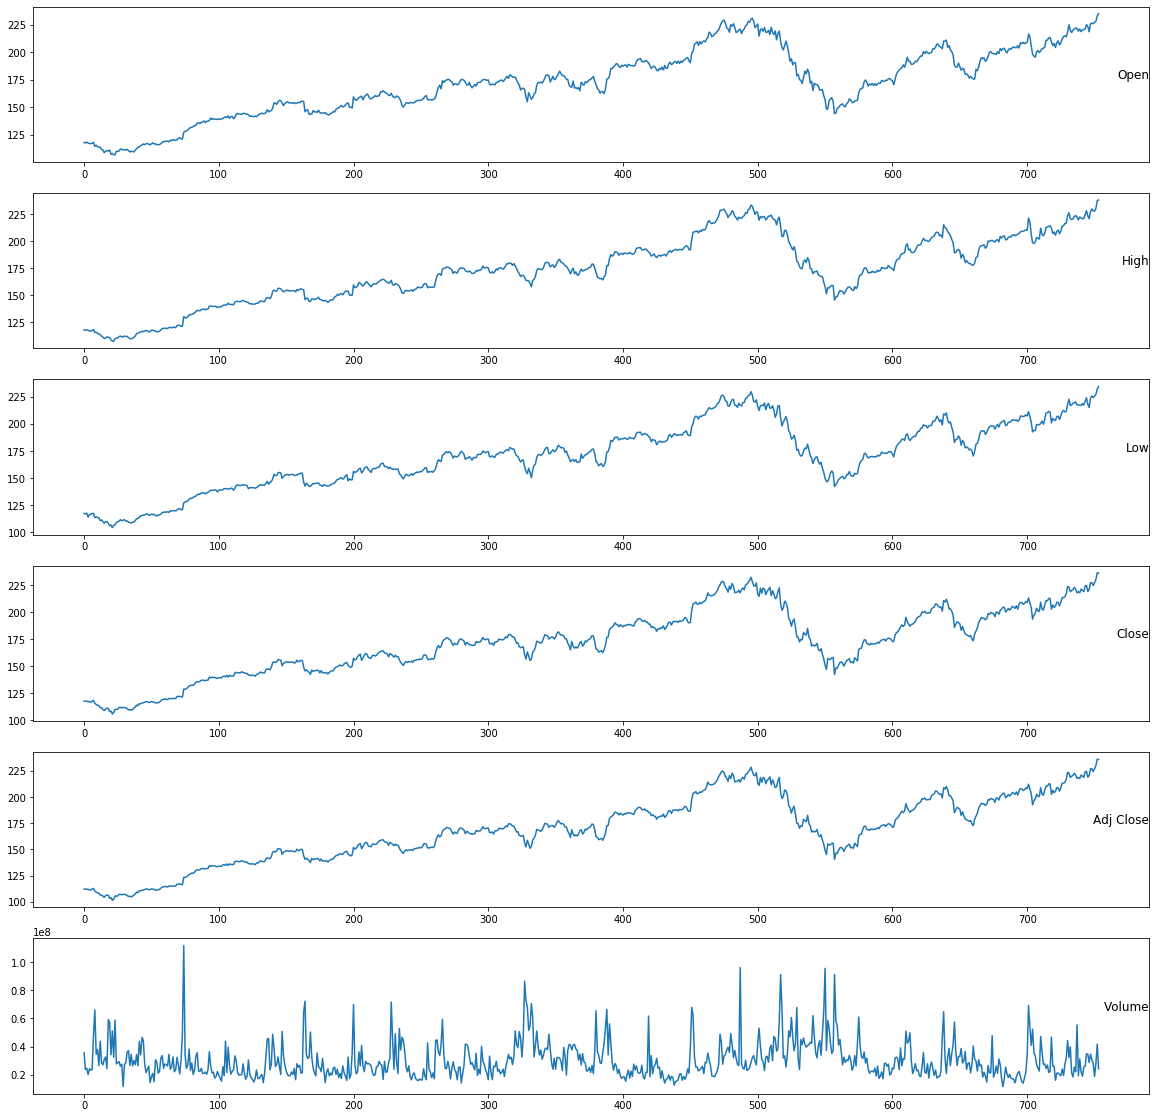

In [8]:
import matplotlib.pyplot as plt
values = data.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6] # the first column is date
i = 1
# plot each column
plt.figure(figsize=(20,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

** One to One

In [0]:
dataset = data['Open']
dataset = dataset.astype('float32')

In [0]:
import numpy as np
dataset = np.array(dataset.values)

In [0]:
lst = []
for i in dataset:
  lst.append([i])

dataset = np.array(lst)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





503/503 [==============================] - 2s 4ms/step - loss: 0.0727
Epoch 2/200
503/503 [==============================] - 1s 2ms/step - loss: 0.0185
Epoch 3/200
503/503 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 4/200
503/503 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 5/200
503/503 [==============================] - 1s 2ms/step - loss: 4.3225e-04
Epoch 6/200
503/503 [==============================] - 1s 2ms/step - loss: 3.7700e-04
Epoch 7/200
503/503 [==============================] - 1s 2ms/step - loss: 3.7445e-04
Epoch 8/200
503/503 [==============================] - 1s 2ms/step - loss: 3.6638e-04
Epoch 9/200
503/503 [==============================] - 1s 2ms/step - loss: 3.5989e-04
Epoch 10/200
503/503 [==============================] - 1s 2ms/step - loss: 3.6534e-04
Epoch 11/200
503/503 [==============================

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [22]:
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.24 RMSE
Test Score: 3.45 RMSE


Ta thấy score của train và test rất nhỏ, và chúng rất gần nhau nên ta thấy không bị underfitting hoặc overfitting

In [0]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

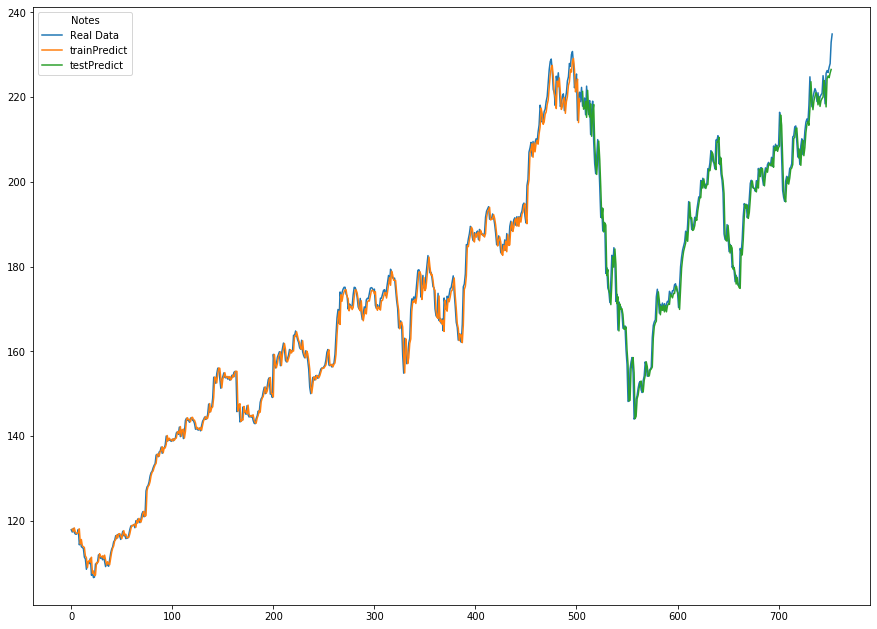

In [24]:
plt.figure(figsize=(15,11))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()

In [25]:
ws = {}
for layer in model.layers:
    ws[layer.name] = layer.get_weights()
ws

{'dense_1': [array([[-0.57649857],
         [-1.0895687 ],
         [ 0.717126  ],
         [-1.3959962 ]], dtype=float32), array([0.01423388], dtype=float32)],
 'lstm_1': [array([[ 6.0206991e-01,  2.8304216e-01,  5.8603513e-01,  4.6247628e-01,
           1.7067409e-01, -1.0798895e-01, -5.9118563e-01, -3.6573410e-04,
          -1.0878338e+00, -1.3810471e+00,  6.2843937e-01, -8.8163537e-01,
           9.3724120e-01, -1.6752357e+00,  8.9327651e-01,  1.0791988e+00]],
        dtype=float32),
  array([[-0.17617251, -0.19658914, -0.39012647,  0.08372848, -0.02308262,
           0.01299367, -0.32674885, -0.11666136, -0.22822423, -0.2043311 ,
           0.46286932,  0.16909331, -0.44279933,  0.08047321,  0.23243937,
          -0.23827969],
         [ 0.08660343, -0.42268744,  0.00994206,  0.13964099,  0.02841771,
          -0.20661362, -0.14430282, -0.48644593, -0.02023174, -0.07676803,
           0.0358225 , -0.13958728,  0.50495106,  0.06580411,  0.38008708,
           0.24988906],
         

In [26]:
x_new = scaler.transform([[243.9]])
x_new = numpy.reshape(x_new, (1, 1,1))

y_new = model.predict(x_new)
y_new = scaler.inverse_transform(y_new)
y_new

array([[240.79408]], dtype=float32)

In [27]:
x_new = scaler.transform([[239.57655]])
x_new = numpy.reshape(x_new, (1, 1,1))

y_new_1 = model.predict(x_new)
y_new_1 = scaler.inverse_transform(y_new_1)
y_new_1

array([[237.00455]], dtype=float32)

In [28]:
x_new = scaler.transform([[235.908]])
x_new = numpy.reshape(x_new, (1, 1,1))

y_new_2 = model.predict(x_new)
y_new_2 = scaler.inverse_transform(y_new_2)
y_new_2

array([[233.7473]], dtype=float32)

In [0]:
model.save(path + '/one_to_one.hdf5')